In [ ]:
# 34강 상관분석 (상관계수분석)

from sklearn.datasets import load_diabetes  # 당뇨병 데이터
import seaborn as sns
import pandas as pd
import scipy.stats as stats

diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
data, target = diabetes['data'], diabetes['target']
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
target
data.shape

(442, 10)

In [ ]:
df = pd.DataFrame(data, columns=diabetes['feature_names'])
df['target']=target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
x=df['bp']     # 상관계수
y=df['target']  # p-value (가설검정. 상관계수가 없을 확률 // 0.05보다 작으면 상관관계가 있다고 보통 간주)

stats.pearsonr(x,y)

(0.4414838489308861, 1.6485327478610998e-22)

In [ ]:
df.corr()  # 상관계수를 한번에 구하는 법

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


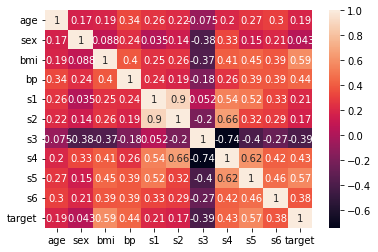

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# 35강 정규표현식

import re
f = open("카카오221017.txt", 'rt')
kakao = f.read()
f.close()

kakao

'연합뉴스언론사 선정9시간 전네이버뉴스\n과방위, \'카카오 먹통\'에 김범수 국감 증인 채택\n김범수 카카오 이사회 의장을 오는 24일 과학기술정보통신부 종합국감장에 증인으로 부르기로 했다. 지난 주말 발생한 카카오 서비스 먹통 사태의 원인 규명과 재발 방지 대책을 카카오의 \'오너\'격인 김 의장에게 따져...\n과방위, ‘카카오 먹통\n경향신문언론사 선정10시간 전네이버뉴스\n국회, 최태원·김범수·이해진 ‘카카오 먹통’ 국정감사 증인 채택\n문서 저장하기\n국민일보언론사 선정5시간 전네이버뉴스\n“카카오로 손해 본 사람 모여라”…소송전 본격화하나\n카카오 데이터센터 화재로 카카오톡을 비롯한 주요 서비스가 마비되면서 피해를 본 이들이 집단소송을 예고했다. 이용자들이 겪은 불편과 손실에 대한 피해보상이 어떻게 이뤄질지에 관심이 쏠리고 있다. 카카오 측은...\n“카카오로 손해 본 사\n연합뉴스언론사 선정6시간 전네이버뉴스\n\'카카오 먹통\' 피해자들, 집단소송 움직임\n조선일보언론사 선정5시간 전네이버뉴스\n“피해내역 올려라” “위자료 청구”... 카카오 먹통에 집단소송 움직임\n서울신문언론사 선정5시간 전네이버뉴스\n카카오 ‘먹통’ 피해자 “모이면 변화”… 집단소송 움직임\n부산일보언론사 선정6시간 전네이버뉴스\n"손해배상 청구" 카카오 피해자들 집단소송 움직임\n문서 저장하기\n뉴시스언론사 선정11시간 전네이버뉴스\n카카오 복구현황 정부 재난문자로 알린다\n갖고 카카오 등 서비스 장애 및 복구 현황을 점검하고 신속한 복구를 독려했다고 17일 밝혔다. 회의는 이종호 장관 주재로 행정안전부, 방송통신위원회 등 관계부처와 SK C&C, 카카오, 네이버 등 장애발생 사업자가 참여해...\n카카오 복구현황 정부\n파이낸셜뉴스언론사 선정10시간 전네이버뉴스\n[카카오 블랙아웃] SK C&C 판교데이터센터 95% 복구\n문서 저장하기\n이데일리언론사 선정12시간 전네이버뉴스\n증권가 "카카오 피해 최대 220억 추산…주가 단기 하락 불가피"\n증권가는 17일 카카오

In [ ]:
re.findall("[가-힣]{9}", kakao)

['과학기술정보통신부', '파이낸셜뉴스언론사', '이코노미스트언론사', '과학기술정보방송통', '파이낸셜뉴스언론사', '방송통신발전기본법']

In [ ]:
re.findall("카\w+", kakao)

['카카오',
 '카카오',
 '카카오',
 '카카오의',
 '카카오',
 '카카오',
 '카카오로',
 '카카오',
 '카카오톡을',
 '카카오',
 '카카오로',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오에',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카톡',
 '카카오',
 '카카오',
 '카카오와',
 '카톡',
 '카카오',
 '카카오',
 '카카오',
 '카카오톡',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오톡',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오',
 '카카오먹통방지법',
 '카카오',
 '카카오먹통방지법',
 '카카오와',
 '카카오',
 '카카오',
 '카카오']

In [ ]:
# 36강 인터넷에 있는 데이터 수집 방법 (데이터 크롤링)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90")
# 200번대 : 문제없음. 400번대 : 존재하지않는 페이지, 500번대 : 로그인처리, 잠금 등
url

<Response [200]>

In [ ]:
url.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="로또 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'로또\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'로또\'의 네이버 통합검색 결과입니다."> <title>로또 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221006.css"> <link rel="stylesheet" type="text/css" href="ht

In [ ]:
html = BeautifulSoup(url.text)

In [ ]:
html.find('#text')

In [ ]:
# 37강 인터넷에 있는 표를 데이터프레임으로 가져오는 법

import pandas as pd
from bs4 import BeautifulSoup
import time
import requests

url37 = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html37 = BeautifulSoup(url37.text)
kospi_page = int(html37.find('td', class_ = 'pgRR').find('a')['href'].split('=')[-1])

total=[]

for n in range(1, kospi_page + 1):
    url37 = url37 = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={}".format(n))
    html37 = BeautifulSoup(url37.text)
    table = html37.find('table', class_ = 'type_2')
    table = pd.read_html(str(table))[0]
    table[table['종목명'].notnull()]
    
    del table['N']
    del table['토론실']

    total.append(table)
    time.sleep(1)   # 1초간격 (트래픽공격 방지)

    print("{}페이지 저장 완료".format(n))

1페이지 저장 완료
2페이지 저장 완료
3페이지 저장 완료
4페이지 저장 완료
5페이지 저장 완료
6페이지 저장 완료
7페이지 저장 완료
8페이지 저장 완료
9페이지 저장 완료
10페이지 저장 완료
11페이지 저장 완료
12페이지 저장 완료
13페이지 저장 완료
14페이지 저장 완료
15페이지 저장 완료
16페이지 저장 완료
17페이지 저장 완료
18페이지 저장 완료
19페이지 저장 완료
20페이지 저장 완료
21페이지 저장 완료
22페이지 저장 완료
23페이지 저장 완료
24페이지 저장 완료
25페이지 저장 완료
26페이지 저장 완료
27페이지 저장 완료
28페이지 저장 완료
29페이지 저장 완료
30페이지 저장 완료
31페이지 저장 완료
32페이지 저장 완료
33페이지 저장 완료
34페이지 저장 완료
35페이지 저장 완료
36페이지 저장 완료
37페이지 저장 완료
38페이지 저장 완료


In [ ]:
len(total)

38

In [ ]:
kospi_page = int(html37.find('td', class_ = 'pgRR').find('a')['href'].split('=')[-1])

In [ ]:
# 38강  인터넷 뉴스 기사 가져오는 방법

import pandas as pd
from bs4 import BeautifulSoup
import time
import requests

url38 = requests.get("https://search.naver.com/search.naver?where=news&query=%ED%95%9C%EA%B5%AD&sm=tab_opt&sort=0&photo=0&field=0&pd=0&ds=&de=&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Aall&is_sug_officeid=0")
html38 = BeautifulSoup(url38.text)

total38 = []

news = html38.find('ul',class_ = 'list_news').find_all('li', class_ = 'bx')
for i in news:
    contents38 = i.find('a', class_ = 'api_txt_lines dsc_txt_wrap').text
    title38 = i.find('a', class_ = 'news_tit').text

    total38.append([title38, contents38])

len(total38)

10

In [25]:
# 39강 수집한 뉴스기사로 빈도분석하고 워드 클라우드 그리기

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
# 이미지 데이터를 불러오고 처리하는 라이브러리
from tqdm import tqdm 

total39 = []

# 400개 (400페이지 - 예시, tqdm : 언제 끝나는지 알려주는 함수)

for i in tqdm(range(1, 3992, 10)):
    
    url39 = requests.get("https://search.naver.com/search.naver?where=news&query=%ED%95%9C%EA%B5%AD&sm=tab_opt&sort=0&photo=0&field=0&pd=0&ds=&de=&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Aall&is_sug_officeid=0")
    html39 = BeautifulSoup(url39.text)
    
    news = html39.find('ul',class_ = 'list_news').find_all('li', class_ = 'bx')
    
    for i in news:
        contents39 = i.find('a', class_ = 'api_txt_lines dsc_txt_wrap').text
        title39 = i.find('a', class_ = 'news_tit').text
        total39.append([title39, contents39])
    
    time.sleep(1)

len(total39)

100%|██████████| 400/400 [13:54<00:00,  2.09s/it]


4000

In [26]:
import re

text = ''

for i in total39:
    text += i[0]
    text += '\n'
    text += i[1]
    text += '\n'

len(text)

623600

In [27]:
box39 = re.findall("[가-힣]{4}", text)
box39
len(box39)

37600

In [28]:
dic = {}

for i in box39:
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1

dic

{'투자했다': 400,
 '나타났다': 400,
 '창원공장': 800,
 '기념식을': 400,
 '개최했다': 400,
 '전략자산': 1200,
 '상시배치': 1200,
 '주한미군': 1200,
 '한국방위': 800,
 '약속이라': 800,
 '언급했다': 400,
 '대변인은': 400,
 '브리핑에': 400,
 '보느냐는': 400,
 '한국성우': 1200,
 '메타버스': 1600,
 '텔레콤이': 400,
 '성우들의': 400,
 '텔레콤은': 400,
 '성우들이': 400,
 '이프랜드': 400,
 '활동하고': 400,
 '인플루언': 400,
 '아프리카': 400,
 '의료기기': 400,
 '한국업체': 400,
 '참가한다': 400,
 '요하네스': 400,
 '버그무역': 400,
 '현지시간': 400,
 '코트라와': 400,
 '한국의료': 400,
 '기기산업': 400,
 '공동으로': 400,
 '진행한다': 400,
 '건강포용': 400,
 '건강정보': 800,
 '차지했다': 400,
 '부문에서': 400,
 '최고점인': 400,
 '한미재계': 400,
 '한국제품': 400,
 '핵심요약': 400,
 '시행으로': 400,
 '개선해야': 400,
 '잇따랐다': 400,
 '전국경제': 400,
 '인연합회': 400,
 '한국무역': 400,
 '제조업의': 400,
 '중간재로': 400,
 '서비스업': 400,
 '우리나라': 400,
 '생산과정': 400,
 '합참의장': 1600,
 '확장억제': 800,
 '방위공약': 800,
 '지속적인': 400,
 '재확인했': 400,
 '회의에는': 400,
 '전략기획': 400,
 '본부장이': 400,
 '기후환경': 400,
 '기사내용': 400,
 '대외직명': 400,
 '환경분야': 400,
 '공공외교': 400,
 '국민의힘': 400,
 '저출산고': 400,
 '령사회위': 400,
 '보였습니': 400,


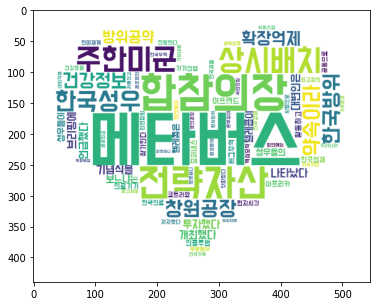

In [29]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf", background_color='white', mask=img)

plt.figure(figsize = (10, 5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)


In [17]:


img = Image.open('하트.png')
img = np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
# 40강 네트워크 반응을 이용해서 데이터 크롤링하기

import json
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup

url40 = requests.get("https://project-team.upbit.com/api/v1/disclosure?region=kr&per_page=20")
data40 = json.loads(url40.text)

for i in data40['data']['posts']:
    print(i['text'])

[기공개] 리브랜딩 : 피체인(PCHAIN)이 플리안(Plian)으로 바뀝니다
어뷰징 물량 회수 및 소각 공시
RINGX 재단, 롯데슈퍼와 업무 제휴 협약 체결
베트남 기업 '마켓 사이공'에 블록체인 모빌리티 플랫폼 수출(SaaS)
[기공개] 카르테시 x Travala 파트너십 체결
[기공개] 엔진, 한국 최대 소셜 게이밍 플랫폼(겜톡톡)과 파트너십... 친환경 NFT 도입 예정
[기공개] 플레이댑, 루데나 프로토콜 NFT아이템 거래 지원 계약
[기공개] Bifrost PAID Network와 업무 협력 파트너쉽 체결
[기공개] 칠리즈, 맨체스터 시티 FC 파트너십 발표
[기공개] 토큰 액면 병합: NPXS가 PUNDIX로 바뀝니다.
[기공개] 크립토닷컴, 비자와 글로벌 파트너쉽 체결 및 주요 회원사로 선정
[기공개] 메디블록, 블록체인 기반의 DID 백신패스 출시 예정
[기공개] P2P 마켓플레이스 오리진 프로토콜 , NFT 및 OUSD 라이트페이퍼 출시
5조원 규모 초대형 북미 펀드인 Celsius Network에서 GOM2에 투자
인도네시아 기업 '퀵스'에 MVL 프로토콜 기반 모빌리티 서비스 플랫폼 수출(SaaS)
오브스(Orbs), 블록체인 기업 MOONSTAKE와 협업
쎄타랩스, 분산형 비디오 및 데이터 전송을 지원하기 위한 초고 트랜잭션 처리량 소액 결제에 대한 두번째 미국특허취득
픽션 네트워크, 신임 대표이사 선출
RINGX 재단, OK캐쉬백((주)위페이)과 ‘마이비(Mivy)’ 플랫폼 전환 협업 진행
토카막 다오 베타 출시
